In [4]:
from scipy import optimize
import numpy as np

In [135]:
rho = 1000
mu = 1e-3
d0 = 0.01
d1 = 0.03
l = 0.01
perm1 = 1e-12
perm2 = 2e-12


q = 0.000001
v0 = q / (np.pi * d0**2 / 4)
# v0 = 0.1
p4 = 1000000
p7 = 2000000


def Re(v, d):
    return rho * v * d / mu

def lyambda(v, d):
    if Re(v, d) < 2300:
        return 64 / (Re(v, d) + 1e-6) 
    else:
        return 0.316 * (Re(v, d) ** 0.25)

def fun(x):
    k = {"v1": 0,
         "v2": 1,
         "v3": 2,
         "v4": 3,
         "v5": 4,
         "v6": 5,
         "p0": 6,
         "p1": 7,
         "p2": 8,
         "p3": 9,
         "p5": 10,
         "p6": 11}
    y = [x[k["p0"]] - x[k["p1"]] - lyambda(v0, d0) * l / d0 / 2 * rho * v0**2,
         x[k["v1"]] - v0,
         x[k["p1"]] - x[k["p2"]] - lyambda(x[k["v1"]], d0) * l / d0 / 2 * rho * x[k["v1"]]**2,
         x[k["v1"]] - x[k["v2"]] - x[k["v4"]],
         x[k["p2"]] - x[k["p3"]] - x[k["v2"]] * mu * l / perm1,
         x[k["v3"]] - x[k["v2"]],
         x[k["p3"]] - p4 - x[k["v3"]] * mu * l / perm1,
         x[k["p2"]] - x[k["p5"]] - lyambda(x[k["v4"]], d1) * l / d1 / 2 * rho * x[k["v4"]]**2,
         x[k["v5"]] - x[k["v4"]],
         x[k["p5"]] - x[k["p6"]] - x[k["v5"]] * mu * l / perm2,
         x[k["v6"]] - x[k["v5"]],
         x[k["p6"]] - p7 - x[k["v6"]] * mu * l / perm2]
    # print(y)
    return y

initial_guess = np.array([
    v0, v0/2, v0/2, v0/2, v0/2, v0/2,  # скорости
    1.5e6, 1.4e6, 1.3e6, 1.2e6, 1.1e6, 1.0e6      # давления от входа к выходу
])
sol = optimize.newton_krylov(fun, initial_guess)
sol

array([ 1.27323801e-02,  3.75774279e-02,  3.75775001e-02, -2.48450633e-02,
       -2.48450785e-02, -2.48450638e-02,  1.75154936e+06,  1.75154932e+06,
        1.75154928e+06,  1.37577500e+06,  1.75154929e+06,  1.87577468e+06])

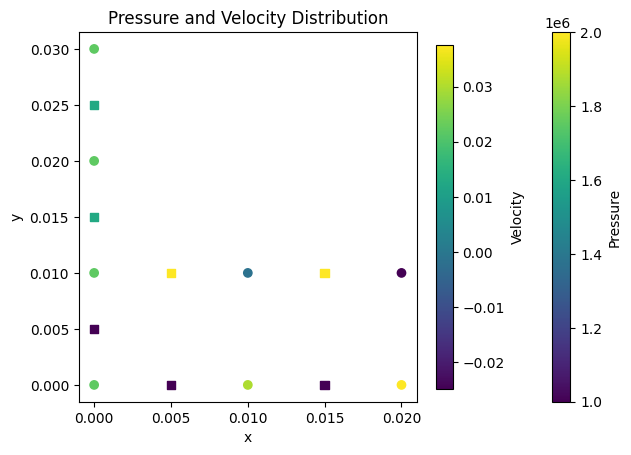

In [144]:
import numpy as np
import matplotlib.pyplot as plt

# Координаты узлов (для давления) и ребер (для скорости)
xn = [0, 0, 0, l, 2*l, 0, l, 2*l]
yn = [3*l, 2*l, l, l, l, 0, 0, 0]
xe = [0, 0, 0.5*l, 1.5*l, 0, 0.5*l, 1.5*l]
ye = [2.5*l, 1.5*l, 1*l, 1*l, 0.5*l, 0*l, 0*l]

# Значения для визуализации
pressure_values = [sol[6], sol[7], sol[8], sol[9], p4, sol[10], sol[11], p7]
velocity_values = [v0, sol[0], sol[1], sol[2], sol[3], sol[4], sol[5]]

fig, ax = plt.subplots()
ax.set_title("Pressure and Velocity Distribution")

# Scatter для давления с colormap "viridis"
sc1 = ax.scatter(xn, yn, c=pressure_values, marker="o")
cbar1 = fig.colorbar(sc1, ax=ax, fraction=0.046, pad=0.2)
cbar1.set_label('Pressure')

# Scatter для скорости с colormap "autumn"
sc2 = ax.scatter(xe, ye, c=velocity_values, marker="s")
cbar2 = fig.colorbar(sc2, ax=ax, fraction=0.046, pad=0.05)
cbar2.set_label('Velocity')

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()
